## Code base for image/table-caption mapping
The demo shows result using the book gastrointestinal-imaging-the-requisites-fourth-edition

In [5]:
import math
from PIL import Image

import pandas as pd
import pickle
from pydantic import BaseModel
from typing import Any
import warnings
warnings.filterwarnings("ignore")

### Caption Files

In [1]:
book_image_caption = './lea_storage/data_book-text-book_fig_caption.pkl'
paper_image_caption = './lea_storage/data_paper-text-paper_figure_caption.pkl'

In [2]:
book_table_caption = './lea_storage/data_book-text-book_table_caption.pkl'
paper_table_caption = './lea_storage/data_paper-text-paper_table_captions.pkl'

In [6]:
with open(book_image_caption, 'rb') as file:
    book_image_caption = pickle.load(file)

In [7]:
with open(paper_image_caption, 'rb') as file:
    paper_image_caption = pickle.load(file)

In [8]:
with open(book_table_caption, 'rb') as file:
    book_table_caption = pickle.load(file)

In [9]:
with open(paper_table_caption, 'rb') as file:
    paper_table_caption = pickle.load(file)

In [11]:
book_image_caption[0]

{'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
 'page_num': 0,
 'position': (323.99761962890625,
  396.2934265136719,
  572.0056762695312,
  415.84320068359375),
 'text': 'Figure 1-1.\u2002 Schematic representation of lower esophageal anatomy  \n(in the presence of a small hiatal hernia).\n'}

### Image mapping

#### Data Prep

In [12]:
class Element(BaseModel):
    type: str
    text: Any
    page_number: int
    table_as_html: Any
    image_path: str
    coordinate : Any

In [13]:
image_position_path = "./VP_storage/output_books/gastrointestinal-imaging-the-requisites-fourth-edition.pkl"

In [14]:
pickle_file_path = "./VP_storage/output_books/gastrointestinal-imaging-the-requisites-fourth-edition.pkl"
with open(pickle_file_path, 'rb') as file:
    image_elements, captions, raw_elements = pickle.load(file)

ValueError: too many values to unpack (expected 3)

In [159]:
image_elements_to_df = [
    {
        'Element_Type': element.type,
        'Text': element.text,
        'Page_Number': element.page_number,
        'Image_Path': element.image_path,
        'Coordinates': element.coordinate
    }
    for element in image_elements
]

df_flattened = pd.DataFrame(image_elements_to_df)

In [160]:
df_flattened['coordinate_bottom_left'] = df_flattened['Coordinates'].apply(lambda x:x[1])

In [161]:
df_flattened.head()

,Element_Type,Text,Page_Number,Image_Path,Coordinates,coordinate_bottom_left
0,image,A-ring Esophageal vestibule Z line B-ring ...,1,./gastrointestinal-imaging-the-requisites-four...,"((928.35009765625, 462.1430358886719), (928.35...","(928.35009765625, 1084.7686767578125)"
1,image,B C D E,2,./gastrointestinal-imaging-the-requisites-four...,"((329.6348571777344, 1575.3785400390625), (329...","(329.6348571777344, 1992.0997314453125)"
2,image,,3,./gastrointestinal-imaging-the-requisites-four...,"((224.96660027777776, 1307.955508888889), (224...","(224.96660027777776, 2016.0221949999998)"
3,image,,3,./gastrointestinal-imaging-the-requisites-four...,"((992.966461111111, 1191.6332669444446), (992....","(992.966461111111, 1991.6999816666666)"
4,image,B,4,./gastrointestinal-imaging-the-requisites-four...,"((879.4627719444444, 166.6333091666666), (879....","(879.4627719444444, 966.7000238888888)"


In [162]:
with open(text_position_path, 'rb') as file:
    text_pos = pickle.load(file)

In [65]:
200*396.2934265136719/72

1100.8150736490886

In [163]:
text_pos[:3]

[{'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
  'page_num': 0,
  'position': (323.99761962890625,
   396.2934265136719,
   572.0056762695312,
   415.84320068359375),
  'text': 'Figure 1-1.\u2002 Schematic representation of lower esophageal anatomy  \n(in the presence of a small hiatal hernia).\n'},
 {'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
  'page_num': 1,
  'position': (41.99383544921875,
   729.4426879882812,
   553.9861450195312,
   748.99267578125),
  'text': 'Figure 1-2.\u2002 Schematic representation of extraluminal (A), submucosal (B), mucosal (C), malignant (D), and benign (E) mass features in contrast imaging \nof the GI tract.\n'},
 {'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
  'page_num': 2,
  'position': (60.0, 729.2059936523438, 307.98345947265625, 748.7559814453125),
  'text': 'Figure 1-3.\u2002 Lateral UGI swallow in a 76-year-old woman with a small \nZe

In [7]:
print({'book_title: 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
  'page_num': 1,
  'position': (323.99761962890625,
   396.2934265136719,
   572.0056762695312,
   415.84320068359375),
  'text': 'Figure 1-1.\u2002 Schematic representation of lower esophageal anatomy  \n(in the presence of a small hiatal hernia).\n,'})

SyntaxError: unterminated string literal (detected at line 1) (3568770494.py, line 1)

#### Step1: Align page numbers & coordinates

In [164]:
for title in text_pos:
    title['page_num'] += 1
    title['position'] = tuple(x * 200 /72 for x in title['position'])

In [165]:
text_pos[:3]

[{'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
  'page_num': 1,
  'position': (899.9933878580729,
   1100.8150736490886,
   1588.9046563042534,
   1155.1200018988716),
  'text': 'Figure 1-1.\u2002 Schematic representation of lower esophageal anatomy  \n(in the presence of a small hiatal hernia).\n'},
 {'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
  'page_num': 2,
  'position': (116.64954291449652,
   2026.229688856337,
   1538.8504028320312,
   2080.535210503472),
  'text': 'Figure 1-2.\u2002 Schematic representation of extraluminal (A), submucosal (B), mucosal (C), malignant (D), and benign (E) mass features in contrast imaging \nof the GI tract.\n'},
 {'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
  'page_num': 3,
  'position': (166.66666666666666,
   2025.5722045898438,
   855.5096096462673,
   2079.877726236979),
  'text': 'Figure 1-3.\u2002 Lateral UGI swallow in a 76-year

#### Step2: Match

In [166]:
for title in text_pos:
    df = df_flattened[df_flattened['Page_Number']==title['page_num']]
    df['distance'] = df['coordinate_bottom_left'].apply(lambda x: math.dist(x, title['position'][0:2]))
    title['image_path'] = df.loc[df['distance'].idxmin()]['Image_Path']

#### Demo

In [167]:
def demo(idx):
    print(text_pos[idx]['text'].replace('\n', ''))
    image = Image.open("./VP_storage/output_books/" + text_pos[idx]['image_path'][1:])
    display(image)

Figure 1-3.  Lateral UGI swallow in a 76-year-old woman with a small Zenker diverticulum (arrow) with a peanut lodged inside.


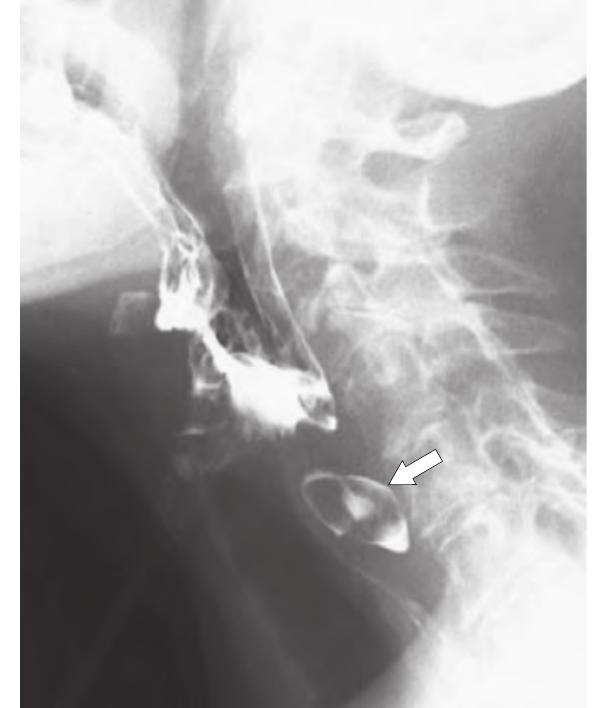

In [168]:
demo(2)

Figure 1-4.  Left posterior oblique barium swallow in a 69-year-old man with a large outpouching (arrow) from the left esophagus due to a Zenker diverticulum.


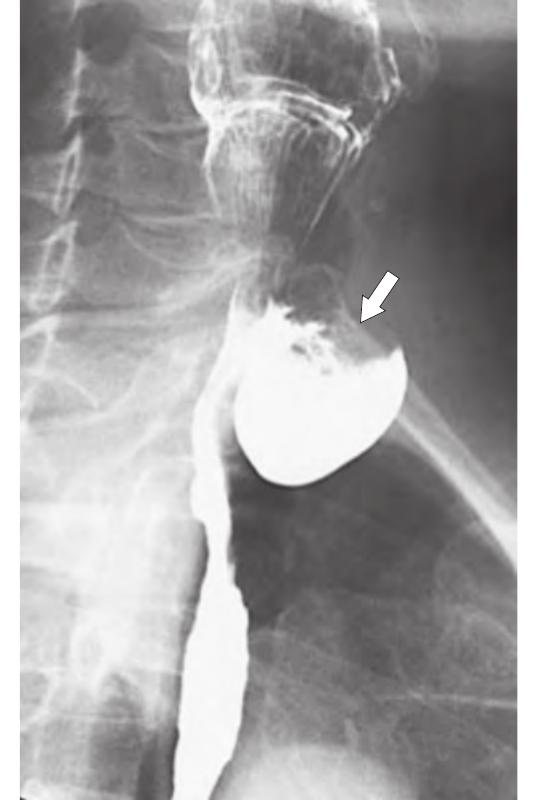

In [169]:
demo(3)

Figure 1-20.  Barium swallow in a 48-year-old woman with a paraesoph-ageal hernia (arrow).


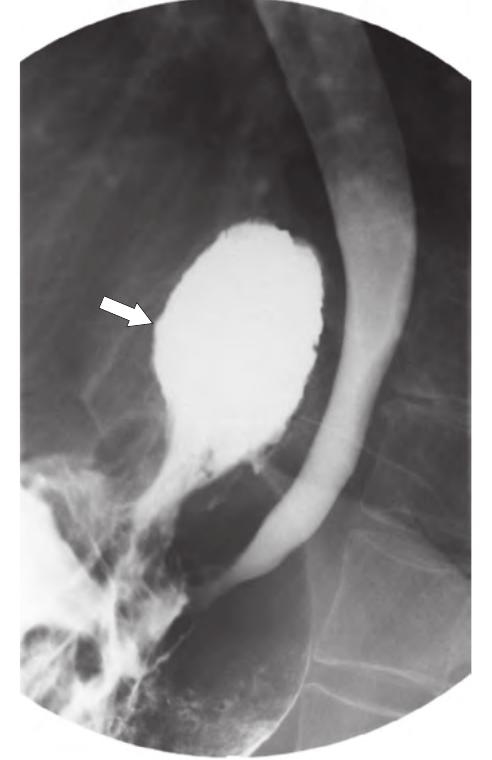

In [170]:
demo(19)

Figure 1-21.  UGI series (A) and coronal noncontrast CT (B) in a 52-year-old woman with a nonobstructing organoaxial volvulus resulting in an “upside down” stomach.


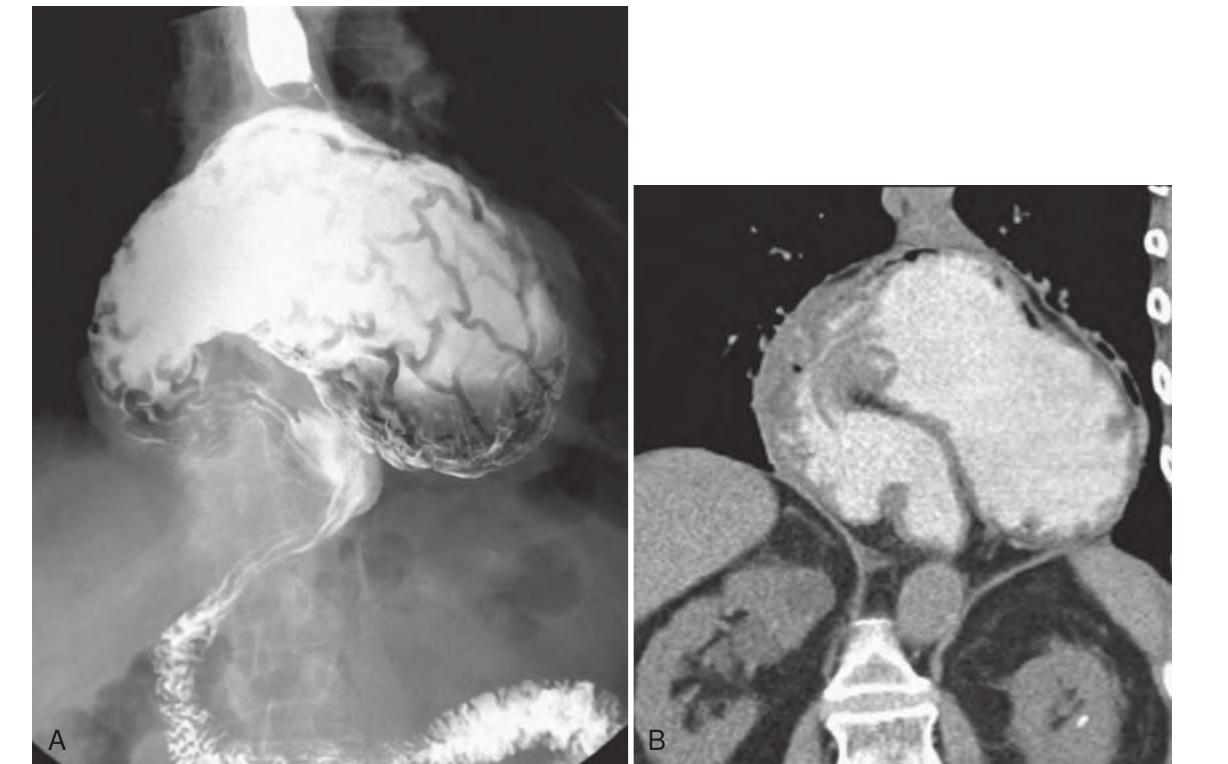

In [171]:
demo(20)

Figure 1-22.  UGI series in an 86-year-old woman with a sliding hernia with the GE junction in the chest (large arrow) and paraesophageal hiatal hernia (small arrow).


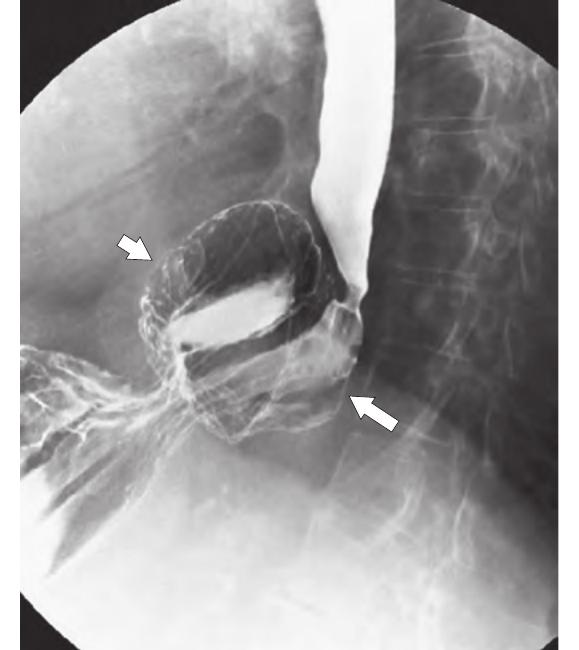

In [172]:
demo(21)

In [173]:
text_pos[:5]

[{'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
  'page_num': 1,
  'position': (899.9933878580729,
   1100.8150736490886,
   1588.9046563042534,
   1155.1200018988716),
  'text': 'Figure 1-1.\u2002 Schematic representation of lower esophageal anatomy  \n(in the presence of a small hiatal hernia).\n',
  'image_path': './gastrointestinal-imaging-the-requisites-fourth-edition/figure-1-1.jpg'},
 {'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
  'page_num': 2,
  'position': (116.64954291449652,
   2026.229688856337,
   1538.8504028320312,
   2080.535210503472),
  'text': 'Figure 1-2.\u2002 Schematic representation of extraluminal (A), submucosal (B), mucosal (C), malignant (D), and benign (E) mass features in contrast imaging \nof the GI tract.\n',
  'image_path': './gastrointestinal-imaging-the-requisites-fourth-edition/figure-2-2.jpg'},
 {'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',

In [174]:
with open("./lea_storage/book_image_poc.pkl", 'wb') as file:
    pickle.dump(text_pos, file)

### Table mapping

#### Data Prep

In [177]:
table_position_path = "./lea_storage/table_position.csv"
text_position_path = "./lea_storage/table_title.pkl"

In [218]:
with open(text_position_path, 'rb') as file:
    text_pos = pickle.load(file)

table_pos = pd.read_csv(table_position_path)
table_pos['pos'] = list(zip(table_pos['x0'], table_pos['y0']))
text_pos[0]

{'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
 'page_num': 10,
 'position': (60.0, 58.0, 215.26011657714844, 70.0),
 'text': 'Table 1-1\u2002 Extrinsic Esophageal Masses\n'}

In [201]:
table_pos.head()

,Unnamed: 0,page_number,table_index,x0,y0,x1,y1,pos
0,0,11,1,68.524307,79.273354,293.511200,165.916840,"(68.52430725097656, 79.27335357666016)"
1,1,14,2,316.031342,79.512390,538.918762,166.535278,"(316.0313415527344, 79.51239013671875)"
2,2,16,3,50.505272,80.059830,277.705292,204.991440,"(50.50527191162109, 80.05982971191406)"
3,3,18,4,316.202423,253.395950,534.608093,353.523041,"(316.2024230957031, 253.3959503173828)"
4,4,19,5,69.078979,185.335907,272.032715,365.680786,"(69.0789794921875, 185.33590698242188)"


#### Mapping

In [219]:
for text in text_pos:
    text['page_num'] += 1
    df = table_pos[table_pos['page_number']==text['page_num']]
    if len(df) > 0:
        df['distance'] = df['pos'].apply(lambda x: math.dist(x, text['position'][0:2]))
        page_num = text['page_num']
        idx = df.loc[df['distance'].idxmin()]['table_index']
        table_path = f"./linda_storage/processed_books_extracted_tablesv4/gastrointestinal-imaging-the-requisites-fourth-edition/images/{page_num}_{idx}_gastrointestinal-imaging-the-requisites-fourth-edition.png"
        df_path = f"./linda_storage/processed_books_extracted_tablesv4/gastrointestinal-imaging-the-requisites-fourth-edition/tables/{page_num}_{idx}_gastrointestinal-imaging-the-requisites-fourth-edition.csv"
        text['image_path'] = table_path
        text['df_path'] = df_path

In [224]:
text_pos[5]

{'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
 'page_num': 28,
 'position': (42.0, 236.6500244140625, 220.6151123046875, 248.6500244140625),
 'text': 'Table 1-7\u2002 Staging of Esophageal Carcinoma\n',
 'image_path': './linda_storage/processed_books_extracted_tablesv4/gastrointestinal-imaging-the-requisites-fourth-edition/images/28_7_gastrointestinal-imaging-the-requisites-fourth-edition.png',
 'df_path': './linda_storage/processed_books_extracted_tablesv4/gastrointestinal-imaging-the-requisites-fourth-edition/tables/28_7_gastrointestinal-imaging-the-requisites-fourth-edition.csv'}

#### demo

In [141]:
def demo(idx):
    print(text_pos[idx]['text'].replace('\n', ''))
    print(pd.read_csv(text_pos[idx]['df_path']).head())
    image = Image.open(text_pos[idx]['image_path'])
    display(image)

Table 1-1  Extrinsic Esophageal Masses
                                  Benign               Malignant
0                 Postcricoid impression  Mediastinal adenopathy
1                  Cricopharyngeal spasm            (metastases)
2           Cervical osteophytic disease             Lung cancer
3  Retropharyngeal masses (e.g., goiter)         Lung metastases
4                           Cardiomegaly                     NaN


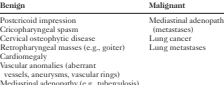

In [142]:
demo(0)

Table 1-5  Causes of Esophagitis
     Unnamed: 0                                         Unnamed: 1
0    Infectious                                             Herpes
1    Iatrogenic  Candida infection CMV HIV Fungal infection Tub...
2         Drugs  Tetracycline Nonsteroidal antiinflammatory dru...
3      Chemical                      Reflux esophagitis Corrosives
4  Inflammatory  Crohn disease Scleroderma Pemphigoid Epidermol...


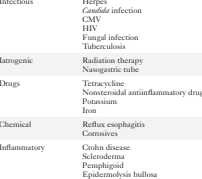

In [144]:
demo(4)

Table 1-7  Staging of Esophageal Carcinoma
  Stage                                  Disease Extension
0     0                                  Carcinoma in situ
1     I                           Lamina propria/submucosa
2   IIA               Transmural but not further extension
3   IIB                Transmural and regional lymph nodes
4   III  Regional lymph nodes (or other nodes), invasio...


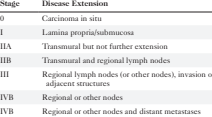

In [143]:
demo(5)

Table 1-8  Causes of Esophageal Dysmotility
      Neurological disease  \
0     Local muscular spasm   
1     Muscular dysfunction   
2  Inflammatory conditions   
3         Systemic disease   
4                    Drugs   

  Brainstem infarction Bulbar palsy Multiple sclerosis Peripheral neuropathies Myasthenia gravis  
0                             Cricopharyngeus spasm*                                              
1  Dermatomyositis Muscular dystrophy Scleroderma...                                              
2  Severe esophagitis (e.g., radiation, caustic, ...                                              
3  Hyperthyroidism, hypothyroidism, amyloidosis, ...                                              
4                  Anticholinergics (e.g., atropine)                                              


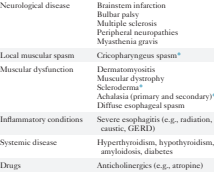

In [145]:
demo(6)

In [149]:
with open("./lea_storage/book_table_poc.pkl", 'wb') as file:
    pickle.dump(text_pos, file)